In [7]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import os
print("Current working dir:", os.getcwd())
print("Files here:", os.listdir())

# Load trained model
model = joblib.load("../models/xgb_model.pkl")

# Reload the dataset & features (same preprocessing as train_model.py)
df = pd.read_csv("../data/features.csv")
feature_cols = [
    "HOME_GAME", "PTS_rolling", "REB_rolling", "AST_rolling", 
    "STL_rolling", "BLK_rolling", "TOV_rolling", 
    "FG_PCT_rolling", "FG3_PCT_rolling", "FT_PCT_rolling"
]

X = df[feature_cols]
y = df["WIN"]

# Train/test split (must match train_model.py)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]


Current working dir: /Users/manrajkalra/Desktop/NBA-Model/notebooks
Files here: ['model_analysis.ipynb', '.ipynb_checkpoints']


/var/folders/fm/6mzwgb052xd1qxdcbn6qt0_w0000gn/T/ipykernel_87094/3156311782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_cols)[indices], palette="viridis")


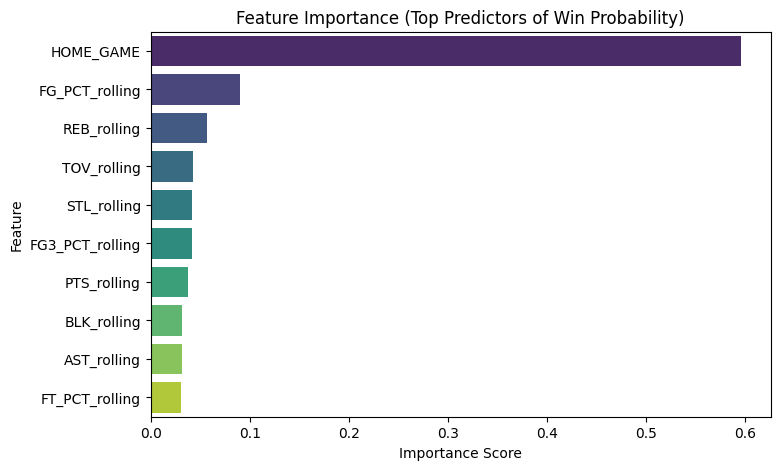

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=np.array(feature_cols)[indices], palette="viridis")
plt.title("Feature Importance (Top Predictors of Win Probability)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


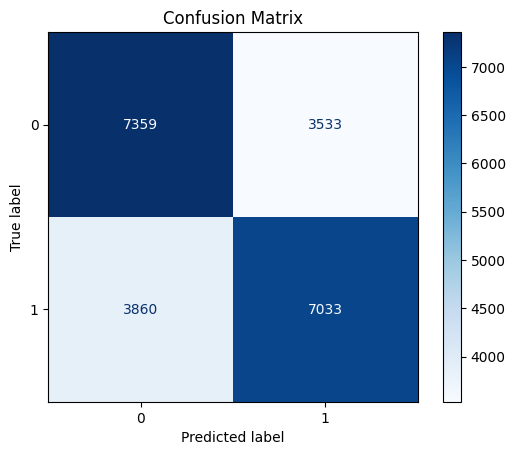

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [10]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))


Classification Report:

              precision    recall  f1-score   support

           0      0.656     0.676     0.666     10892
           1      0.666     0.646     0.655     10893

    accuracy                          0.661     21785
   macro avg      0.661     0.661     0.661     21785
weighted avg      0.661     0.661     0.661     21785



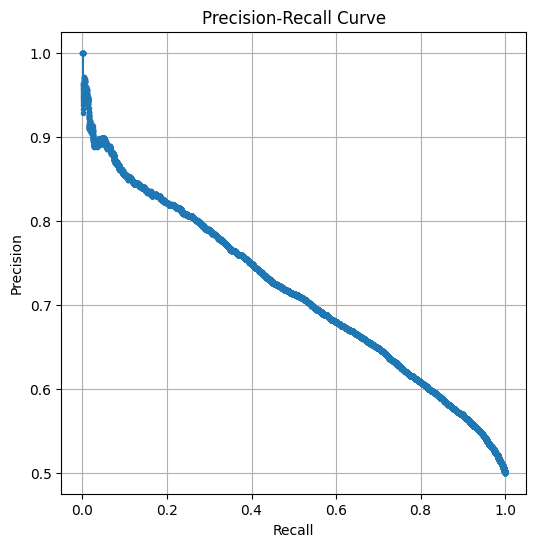

In [11]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker=".")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()
